In [1]:
import tensorflow as tf
from tensorflow import keras 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('Product_data.csv')

In [3]:
print(df.head())

     everyday productid                 productname  quantity
0  2023-08-16   D_10006                CURD - 200 G      60.0
1  2023-08-16   D_10029  STANDARDISED MILK - 500 ml      48.0
2  2023-08-16   D_10006                CURD - 200 G      60.0
3  2023-08-16   D_10017  DOUBLE TONED MILK - 500 ml      72.0
4  2023-08-16   D_10033         TONED MILK - 500 ml      24.0


In [4]:
# Filter for product ID D_10006
df_filtered = df[df['productid'] == 'D_10006']

In [5]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16024 entries, 0 to 2516657
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   everyday     16024 non-null  object 
 1   productid    16024 non-null  object 
 2   productname  16024 non-null  object 
 3   quantity     16024 non-null  float64
dtypes: float64(1), object(3)
memory usage: 625.9+ KB


In [6]:
arima_df = df_filtered[['everyday','quantity']]

In [7]:
arima_df["everyday"]= pd.to_datetime(arima_df["everyday"])

In [8]:
arima_df.quantity = arima_df.groupby(pd.PeriodIndex(arima_df['everyday'], freq="M"))['quantity'].apply(lambda x: x.fillna(x.mean()))

In [9]:
ts = arima_df.groupby(pd.PeriodIndex(arima_df['everyday'], freq="M"))['quantity'].mean()

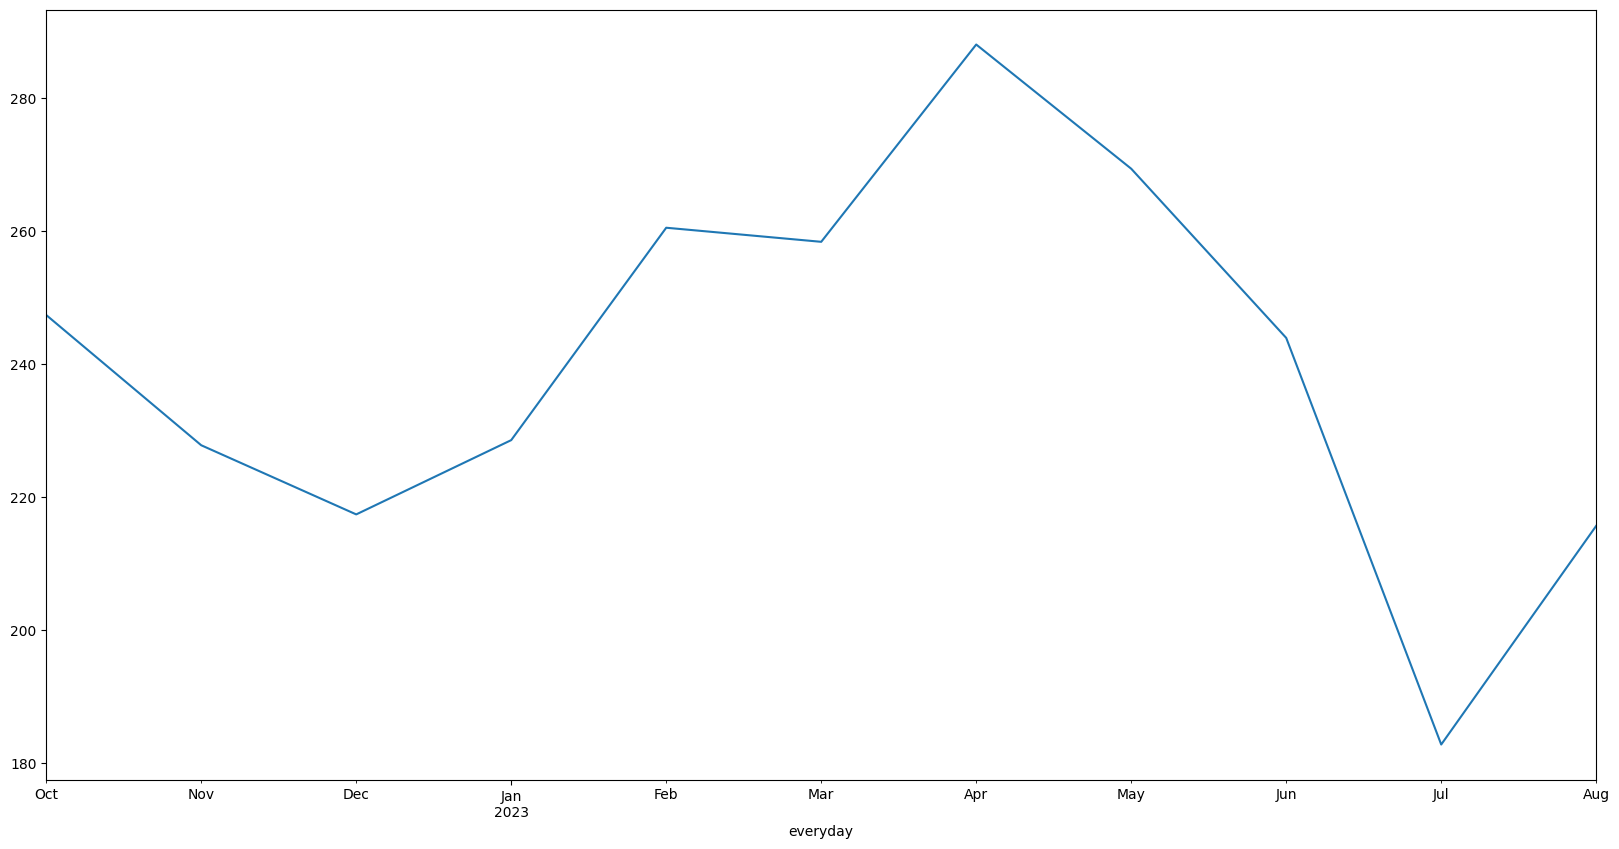

In [10]:
plt.figure(figsize = (20,10))
ts.plot()
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(ts)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.489467
p-value: 0.008262


In [12]:
ts_train = ts[:50]
ts_test = ts[50:]

In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
import itertools
from sklearn.metrics import mean_squared_error

In [15]:
p = range(0,8)
q = range(0,8)
d = range(0,2)

In [16]:
pqd_combination = list(itertools.product(p,d,q))

In [17]:
error = []
pqd = []

In [19]:
for i in pqd_combination:
    A_model = ARIMA(ts_train,order= i).fit()
    predict = A_model.predict(len(ts_train),len(ts)-1)
    e = np.sqrt(mean_squared_error(ts_test,predict))
    pqd.append(i)
    error.append(e)

ValueError: Prediction must have `end` after `start`.